In [1]:
import torch
from torch.utils.tensorboard import SummaryWriter
from tp1 import mse,linear, MSE, Linear, Context
import matplotlib.pyplot as plt

2023-09-30 16:46:59.789501: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-30 16:46:59.818817: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-30 16:47:00.356195: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# 3.  Implémentation des fonctions

In [2]:
# Test du gradient de MSE
yhat = torch.randn(10,5, requires_grad=True, dtype=torch.float64)
y = torch.randn(10,5, requires_grad=True, dtype=torch.float64)
torch.autograd.gradcheck(mse, (yhat, y))

True

In [3]:
#  TODO:  Test du gradient de Linear (sur le même modèle que MSE)
x = torch.randn(10,5, requires_grad=True, dtype=torch.float64)
w = torch.randn(5,2, requires_grad=True, dtype=torch.float64)
b = torch.randn(2, requires_grad=True, dtype=torch.float64)
torch.autograd.gradcheck(linear, (x,w,b))

True

# 4. Descente de gradient

In [4]:
# Les données supervisées
x = torch.randn(50, 13)
y = torch.randn(50, 3)

# Les paramètres du modèle à optimiser
w = torch.randn(13, 3)
b = torch.randn(3)

epsilon = 1e-2

loss_cxt=Context()
linear_cxt=Context()
writer = SummaryWriter()

In [5]:
liste_loss = []
for n_iter in range(100):
    ##  TODO:  Calcul du forward (loss)
    
    yhat = Linear.forward(linear_cxt,x,w,b)
    loss = MSE.forward(loss_cxt, yhat, y)
    liste_loss.append(loss.mean())

    # `loss` doit correspondre au coût MSE calculé à cette itération
    # on peut visualiser avec
    # tensorboard --logdir runs/
    writer.add_scalar('Loss/train', loss.mean(), n_iter)

    # Sortie directe
    print(f"Itérations {n_iter}: loss {loss}")

    ##  TODO:  Calcul du backward (grad_w, grad_b)
    
    loss_backward, _ = MSE.backward(loss_cxt, torch.eye(y.shape[0], y.shape[1]))
    _, grad_w, grad_b = Linear.backward(linear_cxt, loss_backward)
    
    ##  TODO:  Mise à jour des paramètres du modèle
    
    w = w - epsilon*grad_w
    b = b - epsilon*grad_b
    

Itérations 0: loss 17.059663772583008
Itérations 1: loss 17.054780960083008
Itérations 2: loss 17.049938201904297
Itérations 3: loss 17.045127868652344
Itérations 4: loss 17.040355682373047
Itérations 5: loss 17.035619735717773
Itérations 6: loss 17.030916213989258
Itérations 7: loss 17.0262508392334
Itérations 8: loss 17.021621704101562
Itérations 9: loss 17.01702308654785
Itérations 10: loss 17.012460708618164
Itérations 11: loss 17.007936477661133
Itérations 12: loss 17.003442764282227
Itérations 13: loss 16.99898338317871
Itérations 14: loss 16.994556427001953
Itérations 15: loss 16.990161895751953
Itérations 16: loss 16.985803604125977
Itérations 17: loss 16.981477737426758
Itérations 18: loss 16.977184295654297
Itérations 19: loss 16.97292137145996
Itérations 20: loss 16.968692779541016
Itérations 21: loss 16.964494705200195
Itérations 22: loss 16.9603271484375
Itérations 23: loss 16.956193923950195
Itérations 24: loss 16.952089309692383
Itérations 25: loss 16.94801902770996
Itér

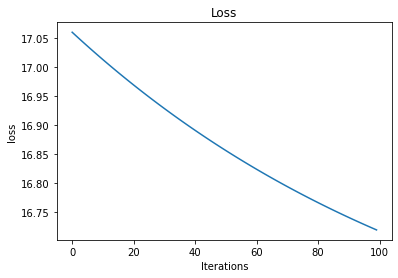

In [6]:
plt.figure()
plt.plot(torch.arange(100),liste_loss)
plt.title("Loss")
plt.xlabel("Iterations")
plt.ylabel("loss")
plt.show()